# IMDB Review - Natural Language Processing_ Sentiment analysis.

## Problem statement

Build multiple machine learning models and select best one for sentiment analysis. Based on user comment your model should be able to predict if the movie is worth to watch or not.

In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import regexp_tokenize
from nltk.corpus import stopwords
import string
import nltk
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
 # Importing libraries
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Importing dataset
# Due to memory and longer running time considering Dataset_1 to build the model

imdb = pd.read_csv('IMDB- NLP Dataset1.csv',skipinitialspace = True)
# imdb_2 = pd.read_csv('IMDB-NLP Dataset2.csv',skipinitialspace = True)

In [27]:
# Merging the dataset

# imdb = pd.concat([imdb_1,imdb_2])
# imdb.head()

In [28]:
# Checking the shape of the dataset

imdb.shape

(24999, 8)

In [29]:
# Checking the null values

imdb.isnull().sum()

review            0
sentiment         0
Unnamed: 2    24976
Unnamed: 3    24991
Unnamed: 4    24997
Unnamed: 5    24998
Unnamed: 6    24998
Unnamed: 7    24998
dtype: int64

In [30]:
# Dropping the columns 'Unnamed'

imdb.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'], axis=1, inplace=True)
imdb.shape

(24999, 2)

In [31]:
# Checking the ratio of values present in the feature 'sentiment'

imdb['sentiment'].value_counts()

negative                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           12514
positive                                                                                                                                                                                                                                                                                                                                                                                       

In [32]:
# Dropping the rows which are not equal to 'positive' and 'negative' in sentiment column

imdb.drop(imdb[(imdb['sentiment'] != 'positive') & (imdb['sentiment'] != 'negative')].index, inplace=True)

In [33]:
# Checking the count of values

imdb['sentiment'].value_counts()

negative    12514
positive    12462
Name: sentiment, dtype: int64

In [34]:
# Checking the data_loss and dimension of the data after dropping the rows

# data_loss = (49910-50000)/50000*100
# print('Data Loss =>',data_loss,'%')
# print('Shape of the Dataset =>',imdb.shape)

In [35]:
# Encoding the target variable

imdb['sentiment'].replace({'positive':0, 'negative':1}, inplace = True)
imdb['sentiment'].value_counts()

1    12514
0    12462
Name: sentiment, dtype: int64

In [36]:
# Creating new feature 'length'

imdb['length'] = imdb.review.str.len()
imdb.head(5)

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,0,1761
1,A wonderful little production. <br /><br />The...,0,998
2,I thought this was a wonderful way to spend ti...,0,926
3,Basically there's a family where a little boy ...,1,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,1317


In [37]:
# Preprocessing the data with regular expressions

imdb['review'] = imdb['review'].str.lower()

# Replace email addresses with 'email'
imdb['review'] = imdb['review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')


# Replace URLs with 'webaddress'
imdb['review'] = imdb['review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


# Replace money symbols with 'dollars'
imdb['review'] = imdb['review'].str.replace(r'€|\$', 'dollars')


# Replace 10 digit phone numbers (formats include paranthesis, space, no space, dashes) with 'phonenumber'
imdb['review'] = imdb['review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')


# Replace number with 'number'
imdb['review'] = imdb['review'].str.replace(r'\d+(\.\d+)?', 'numbr')


# Remove punctuation
imdb['review'] = imdb['review'].str.replace(r'[^\w\d\s]', ' ')


# replace whitespaces between terms with a single space
imdb['review'] = imdb['review'].str.replace(r'\s+', ' ')


# Remove leading and trailing whitespaces
imdb['review'] = imdb['review'].str.replace(r'^\s+|\s+?$', '')

In [38]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

imdb['review'] = imdb['review'].apply(word_tokenize)

imdb['review'] = imdb['review'].apply(lambda x: [lemma.lemmatize(word) for word in x])

In [39]:
# Removing stopwords

import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['wa','ha','u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','idk','br',
                                               'wanna','oz'])

# Convert list elements to strings
imdb['review'] = imdb['review'].apply(lambda x: ' '.join(x))

imdb['review'] = imdb['review'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [40]:
# Adding new column clean length, after removing stopwords and cleaning the dataset

imdb['clean_length'] = imdb.review.str.len()
imdb.head(10)

,review,sentiment,length,clean_length
0,one reviewer mentioned watching numbr episode ...,0,1761,1058
1,wonderful little production filming technique ...,0,998,641
2,thought wonderful way spend time hot summer we...,0,926,569
3,basically family little boy jake think zombie ...,1,748,437
4,petter mattei love time money visually stunnin...,0,1317,836
5,probably time favorite movie story selflessnes...,0,656,374
6,sure would like see resurrection dated seahunt...,0,726,424
7,show amazing fresh innovative idea numbr first...,1,934,553
8,encouraged positive comment film looking forwa...,1,681,410
9,like original gut wrenching laughter like movi...,0,176,99


In [41]:
# Difference between Original Length and Clean length

print('Original Length =', imdb.length.sum())
print('Clean Length =', imdb.clean_length.sum())

Original Length = 32761224
Clean Length = 20274995


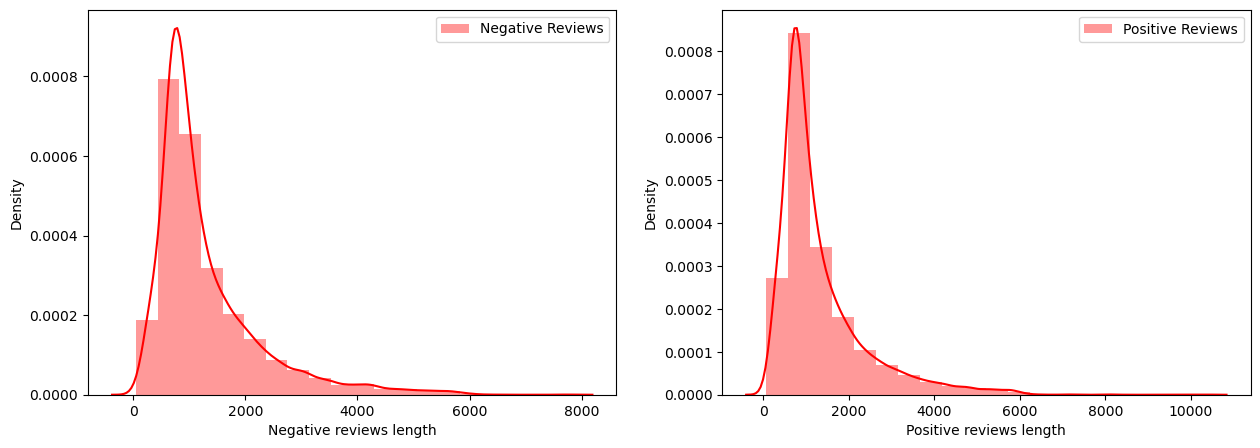

In [42]:
# Messages distribution before cleaning

f,ax = plt.subplots(1,2, figsize = (15,5))

sns.distplot(imdb[imdb['sentiment']==1]['length'], bins = 20, ax=ax[0], label='Negative Reviews', color ='r')
ax[0].set_xlabel('Negative reviews length')
ax[0].legend()

sns.distplot(imdb[imdb['sentiment']==0]['length'], bins = 20, ax=ax[1], label='Positive Reviews', color ='r')
ax[1].set_xlabel('Positive reviews length')
ax[1].legend()

plt.show()

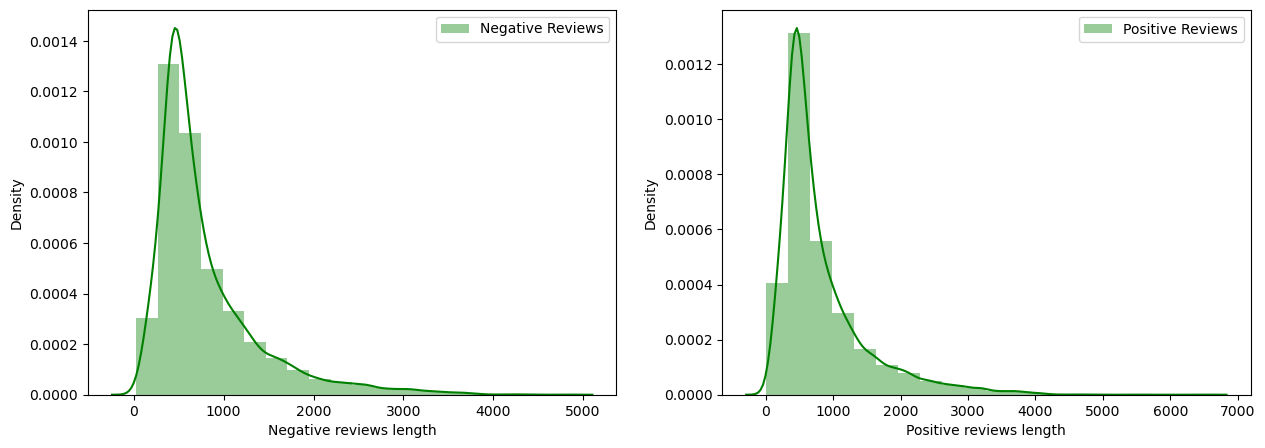

In [43]:
# Messages distribution before cleaning

f,ax = plt.subplots(1,2, figsize = (15,5))

sns.distplot(imdb[imdb['sentiment']==1]['clean_length'], bins = 20, ax=ax[0], label='Negative Reviews', color ='g')
ax[0].set_xlabel('Negative reviews length')
ax[0].legend()

sns.distplot(imdb[imdb['sentiment']==0]['clean_length'], bins = 20, ax=ax[1], label='Positive Reviews', color ='g')
ax[1].set_xlabel('Positive reviews length')
ax[1].legend()

plt.show()

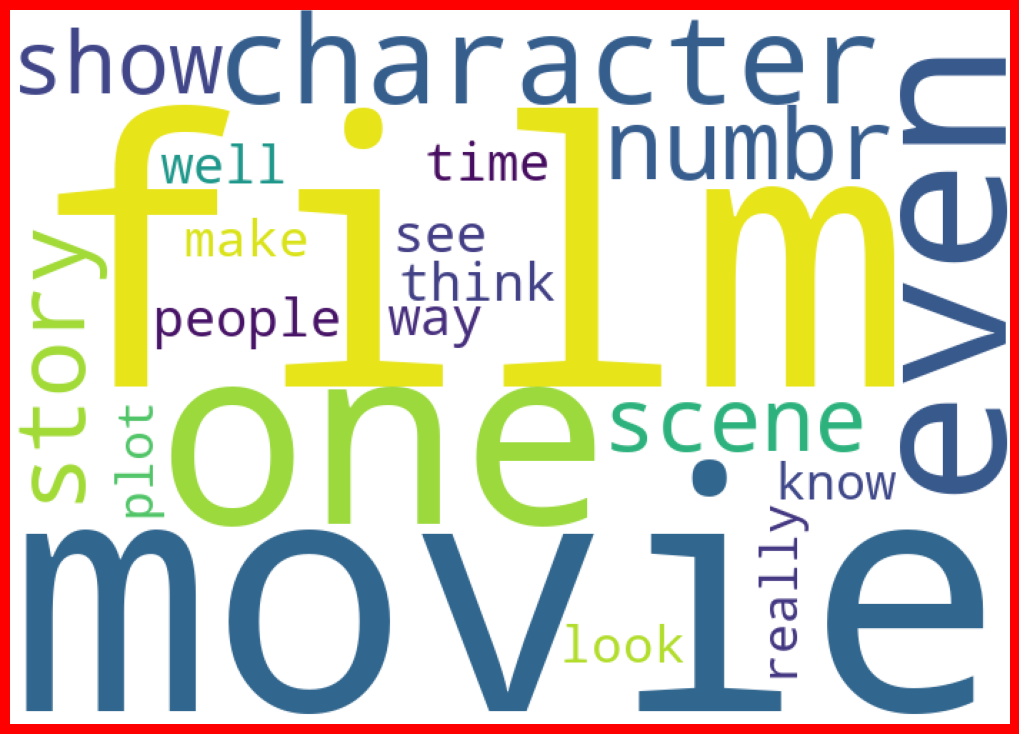

In [44]:
# Getting sense of loud words in negative by wordcloud

from wordcloud import WordCloud


spams = imdb['review'][imdb['sentiment']==1]

spam_cloud = WordCloud(width = 700, height = 500, background_color = 'white', max_words = 20).generate(' '.join(spams))

plt.figure(figsize = (10,8), facecolor = 'r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

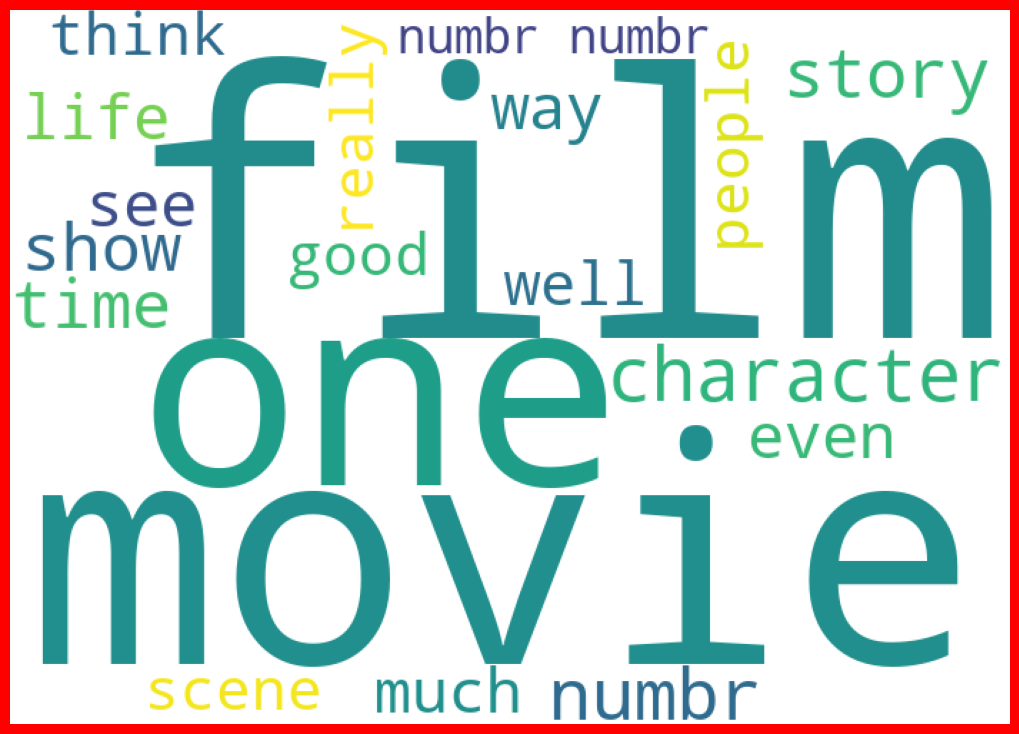

In [45]:
# Getting sense of loud words in spam by wordcloud

from wordcloud import WordCloud


spams = imdb['review'][imdb['sentiment']==0]

spam_cloud = WordCloud(width = 700, height = 500, background_color = 'white', max_words = 20).generate(' '.join(spams))

plt.figure(figsize = (10,8), facecolor = 'r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [46]:
# Vectorization by TF-IDF (TfidfVectorizer)
# Convert text into vector using TF-IDF
# Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer


tf_vec = TfidfVectorizer()

x = tf_vec.fit_transform(imdb['review'])
y = imdb['sentiment']

# Model Evaluation

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
# Checking the dimension of the data 

x.shape

(24976, 67632)

In [52]:
# Checking the dimension of the data 

y.shape

(24976,)

## Finding Random State

In [53]:
max_Accuracy = 0
max_Random_state = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    accuracy = accuracy_score(y_test,predrf)
    
    if accuracy > max_Accuracy:
        max_Accuracy = accuracy
        max_Random_state = i
        
print("Max Accuracy Score is",max_Accuracy*100,"on Random State",max_Random_state)

Max Accuracy Score is 86.05365007340184 on Random State 44


## Train_Test_Split

In [54]:
# Training the Model with .30 as test size and random state at 44

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 44)

In [55]:
MB = MultinomialNB()
MB.fit(x_train,y_train)
print(MB.score(x_train,y_train))
MB_predict = MB.predict(x_test)
cross_val_1 = cross_val_score(MB,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,MB_predict)*100)
print('CV score of MultinomialNB:',cross_val_1.mean()*100)
print(confusion_matrix(y_test,MB_predict))
print(classification_report(y_test,MB_predict))

0.9200832799487508
Accuracy Score: 86.83536194746956
CV score of MultinomialNB: 86.19873275998178
[[2604  454]
 [ 368 2818]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      3058
           1       0.86      0.88      0.87      3186

    accuracy                           0.87      6244
   macro avg       0.87      0.87      0.87      6244
weighted avg       0.87      0.87      0.87      6244



In [56]:
LR = LogisticRegression()

LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict = LR.predict(x_test)
cross_val_2 = cross_val_score(LR,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,LR_predict)*100)
print('CV score of LogisticRegression:',cross_val_2.mean()*100)
print(confusion_matrix(y_test,LR_predict))
print(classification_report(y_test,LR_predict))

0.9358317317958573
Accuracy Score: 89.28571428571429
CV score of LogisticRegression: 88.80924960188369
[[2786  272]
 [ 397 2789]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3058
           1       0.91      0.88      0.89      3186

    accuracy                           0.89      6244
   macro avg       0.89      0.89      0.89      6244
weighted avg       0.89      0.89      0.89      6244



In [57]:
svc = SVC(probability = True)

svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
svc_predict = svc.predict(x_test)
cross_val_3 = cross_val_score(svc,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,svc_predict)*100)
print('CV score of Support Vector Classifier:',cross_val_3.mean()*100)
print(confusion_matrix(y_test,svc_predict))
print(classification_report(y_test,svc_predict))

0.9934870809310271
Accuracy Score: 89.79820627802691
CV score of Support Vector Classifier: 89.13756510714077
[[2803  255]
 [ 382 2804]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3058
           1       0.92      0.88      0.90      3186

    accuracy                           0.90      6244
   macro avg       0.90      0.90      0.90      6244
weighted avg       0.90      0.90      0.90      6244



In [58]:
KNC = KNeighborsClassifier()

KNC.fit(x_train,y_train)
print(KNC.score(x_train,y_train))
KNC_predict = KNC.predict(x_test)
cross_val_4 = cross_val_score(KNC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,KNC_predict)*100)
print('CV score of KNeighbors Classifier:',cross_val_4.mean()*100)
print(confusion_matrix(y_test,KNC_predict))
print(classification_report(y_test,KNC_predict))

0.8489216314328422
Accuracy Score: 75.51249199231262
CV score of KNeighbors Classifier: 75.75673351494008
[[2490  568]
 [ 961 2225]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.77      3058
           1       0.80      0.70      0.74      3186

    accuracy                           0.76      6244
   macro avg       0.76      0.76      0.75      6244
weighted avg       0.76      0.76      0.75      6244



In [59]:
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)
print(DTC.score(x_train,y_train))
DTC_predict = DTC.predict(x_test)
cross_val_5 = cross_val_score(DTC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,DTC_predict)*100)
print('CV score of Decision Tree Classifier:',cross_val_5.mean()*100)
print(confusion_matrix(y_test,DTC_predict))
print(classification_report(y_test,DTC_predict))

1.0
Accuracy Score: 71.90903267136451
CV score of Decision Tree Classifier: 71.21236769195136
[[2202  856]
 [ 898 2288]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      3058
           1       0.73      0.72      0.72      3186

    accuracy                           0.72      6244
   macro avg       0.72      0.72      0.72      6244
weighted avg       0.72      0.72      0.72      6244



In [60]:
ETC = ExtraTreeClassifier()

ETC.fit(x_train,y_train)
print(ETC.score(x_train,y_train))
ETC_predict = ETC.predict(x_test)
cross_val_6 = cross_val_score(ETC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,ETC_predict)*100)
print('CV score of Extra Tree Classifier:',cross_val_6.mean()*100)
print(confusion_matrix(y_test,ETC_predict))
print(classification_report(y_test,ETC_predict))

1.0
Accuracy Score: 65.24663677130044
CV score of Extra Tree Classifier: 64.48585895743622
[[2006 1052]
 [1118 2068]]
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      3058
           1       0.66      0.65      0.66      3186

    accuracy                           0.65      6244
   macro avg       0.65      0.65      0.65      6244
weighted avg       0.65      0.65      0.65      6244



In [61]:
RFC = RandomForestClassifier()

RFC.fit(x_train,y_train)
print(RFC.score(x_train,y_train))
RFC_predict = RFC.predict(x_test)
cross_val_7 = cross_val_score(RFC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,RFC_predict)*100)
print('CV score of Random Forest Classifier:',cross_val_7.mean()*100)
print(confusion_matrix(y_test,RFC_predict))
print(classification_report(y_test,RFC_predict))

1.0
Accuracy Score: 85.77834721332479
CV score of Random Forest Classifier: 84.96154921935546
[[2716  342]
 [ 546 2640]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3058
           1       0.89      0.83      0.86      3186

    accuracy                           0.86      6244
   macro avg       0.86      0.86      0.86      6244
weighted avg       0.86      0.86      0.86      6244



In [62]:
GBC = GradientBoostingClassifier()

GBC.fit(x_train,y_train)
print(GBC.score(x_train,y_train))
GBC_predict = GBC.predict(x_test)
cross_val_8 = cross_val_score(GBC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,GBC_predict)*100)
print('CV score of Gradient Boosting Classifier:',cross_val_8.mean()*100)
print(confusion_matrix(y_test,GBC_predict))
print(classification_report(y_test,GBC_predict))

0.8308242579543028
Accuracy Score: 80.81358103779628
CV score of Gradient Boosting Classifier: 80.60538360618426
[[2655  403]
 [ 795 2391]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      3058
           1       0.86      0.75      0.80      3186

    accuracy                           0.81      6244
   macro avg       0.81      0.81      0.81      6244
weighted avg       0.81      0.81      0.81      6244



In [63]:
BC = BaggingClassifier()

BC.fit(x_train,y_train)
print(BC.score(x_train,y_train))
BC_predict = BC.predict(x_test)
cross_val_9 = cross_val_score(BC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,BC_predict)*100)
print('CV score of Bagging Classifier:',cross_val_9.mean()*100)
print(confusion_matrix(y_test,BC_predict))
print(classification_report(y_test,BC_predict))

0.9875613922699125
Accuracy Score: 78.5554131966688
CV score of Bagging Classifier: 77.9027746721902
[[2573  485]
 [ 854 2332]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      3058
           1       0.83      0.73      0.78      3186

    accuracy                           0.79      6244
   macro avg       0.79      0.79      0.79      6244
weighted avg       0.79      0.79      0.79      6244



## AUC_ROC_Curve

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

MultinomialNB() 0.868015808206029
LogisticRegression() 0.8932226586476069
RandomForestClassifier() 0.8583937164598059
ExtraTreeClassifier() 0.6525370356000768
DecisionTreeClassifier() 0.7191101766763272
KNeighborsClassifier() 0.7563127720730451
GradientBoostingClassifier() 0.8093426645432499
BaggingClassifier() 0.7866759494304916
SVC(probability=True) 0.8983563021180384


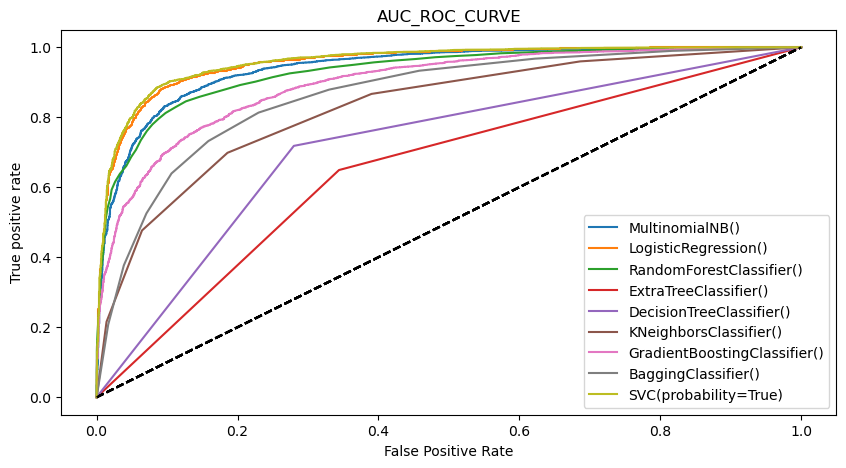

In [65]:
model = [MB,LR,RFC,ETC,DTC,KNC,GBC,BC,svc]

auc=[]


plt.figure(figsize=(10,5))
for i in model:
    y_pred_prob = i.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob,pos_label=True)
    plt.plot(fpr,tpr,label=i )
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive rate')
    plt.title('AUC_ROC_CURVE')
    plt.legend()


    auc_score = roc_auc_score(y_test,i.predict(x_test))
    auc.append(auc_score)
    print(i,auc_score)
plt.show()